<a href="https://colab.research.google.com/github/JoonYoung-Sohn/practice/blob/master/FastAI_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.basics import *

In [10]:
n=100
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
#x[:5]
x[96:]

tensor([[ 0.6508,  1.0000],
        [ 0.8135,  1.0000],
        [-0.1950,  1.0000],
        [-0.5984,  1.0000]])

In [11]:
a = tensor(3.,2)
a

tensor([3., 2.])

In [12]:
y = x@a + 0.25*torch.randn(n)

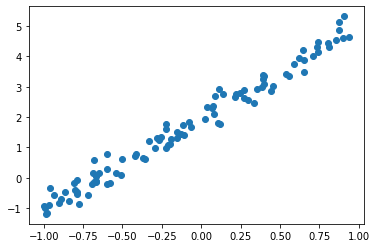

In [13]:
plt.scatter(x[:,0], y);


In [14]:
def mse(y_hat, y):
  return ((y_hat-y)**2).mean()

In [15]:
a = tensor(-1.,1)
y_hat = x@a
mse(y_hat, y)

tensor(5.7105)

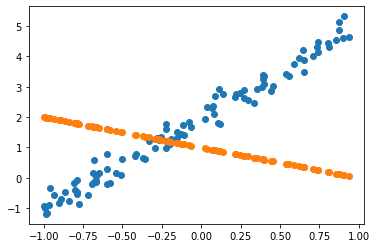

In [16]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat)

In [17]:
a = nn.Parameter(a)
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [18]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [19]:
lr = 1e-1
for t in range(100): update()

tensor(5.7105, grad_fn=<MeanBackward0>)
tensor(1.5038, grad_fn=<MeanBackward0>)
tensor(0.4431, grad_fn=<MeanBackward0>)
tensor(0.1689, grad_fn=<MeanBackward0>)
tensor(0.0979, grad_fn=<MeanBackward0>)
tensor(0.0796, grad_fn=<MeanBackward0>)
tensor(0.0748, grad_fn=<MeanBackward0>)
tensor(0.0736, grad_fn=<MeanBackward0>)
tensor(0.0733, grad_fn=<MeanBackward0>)
tensor(0.0732, grad_fn=<MeanBackward0>)


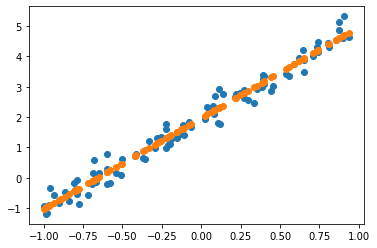

In [20]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a.detach());